In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import rc
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler

sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv(
    "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data",
    sep='\t', index_col=0,
)

In [3]:
df = df[df['train'] == 'T']
X = df.drop(columns=['lpsa', 'train']).astype(float)
y = df['lpsa'].astype(float)

In [4]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), index=X.index, columns=X.columns)

In [5]:
def fs_eps_path(X, y, max_iter=500, eps=0.01):
    X = np.copy(X)
    r = np.copy(y)
    betas = np.zeros((max_iter + 1, X.shape[1]))
    n_iter = 0
    
    while True:
        corr = np.absolute([pearsonr(x, r)[0] for x in X.T])
        j = np.argmax(corr)
        
        if n_iter >= max_iter or corr[j] < 0.01:
            break
        
        delta = eps * np.sign(np.dot(X.T[j], r))
        beta = betas[n_iter]
        beta[j] += delta
        r -= delta * X.T[j]
        
        n_iter += 1
        betas[n_iter] = beta
    
    return betas[1:n_iter+1]

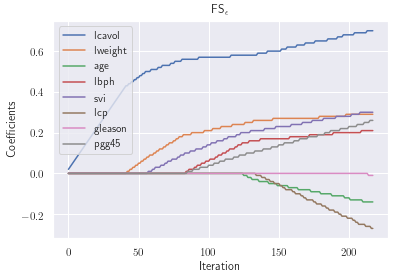

In [6]:
coefs = fs_eps_path(X, y, eps=0.01)

rc('text', usetex=True)
ax = pd.DataFrame(data=coefs, columns=X.columns).plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Coefficients")
ax.set_title(r"FS$_\epsilon$");

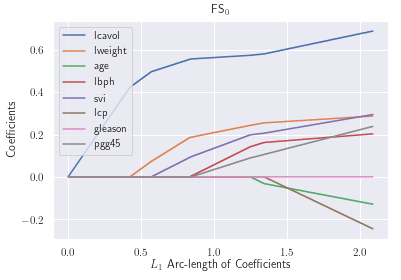

In [7]:
eps = 0.001
max_iter = int(5 / eps)
coefs = fs_eps_path(X, y, max_iter=max_iter, eps=eps)

ax = pd.DataFrame(
    data=coefs,
    index=eps * np.arange(coefs.shape[0]),
    columns=X.columns,
).plot()
ax.set_xlabel(r"$L_1$ Arc-length of Coefficients")
ax.set_ylabel("Coefficients")
ax.set_title(r"FS$_0$");